### Creating An ANN using Pytorch

In [1]:
import pandas as pd
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [3]:
import seaborn as sns

In [4]:
import numpy as np
df['Outcome']=np.where(df['Outcome']==1,"Diabetic","No Diabetic")

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,Diabetic
1,1,85,66,29,0,26.6,0.351,31,No Diabetic
2,8,183,64,0,0,23.3,0.672,32,Diabetic
3,1,89,66,23,94,28.1,0.167,21,No Diabetic
4,0,137,40,35,168,43.1,2.288,33,Diabetic


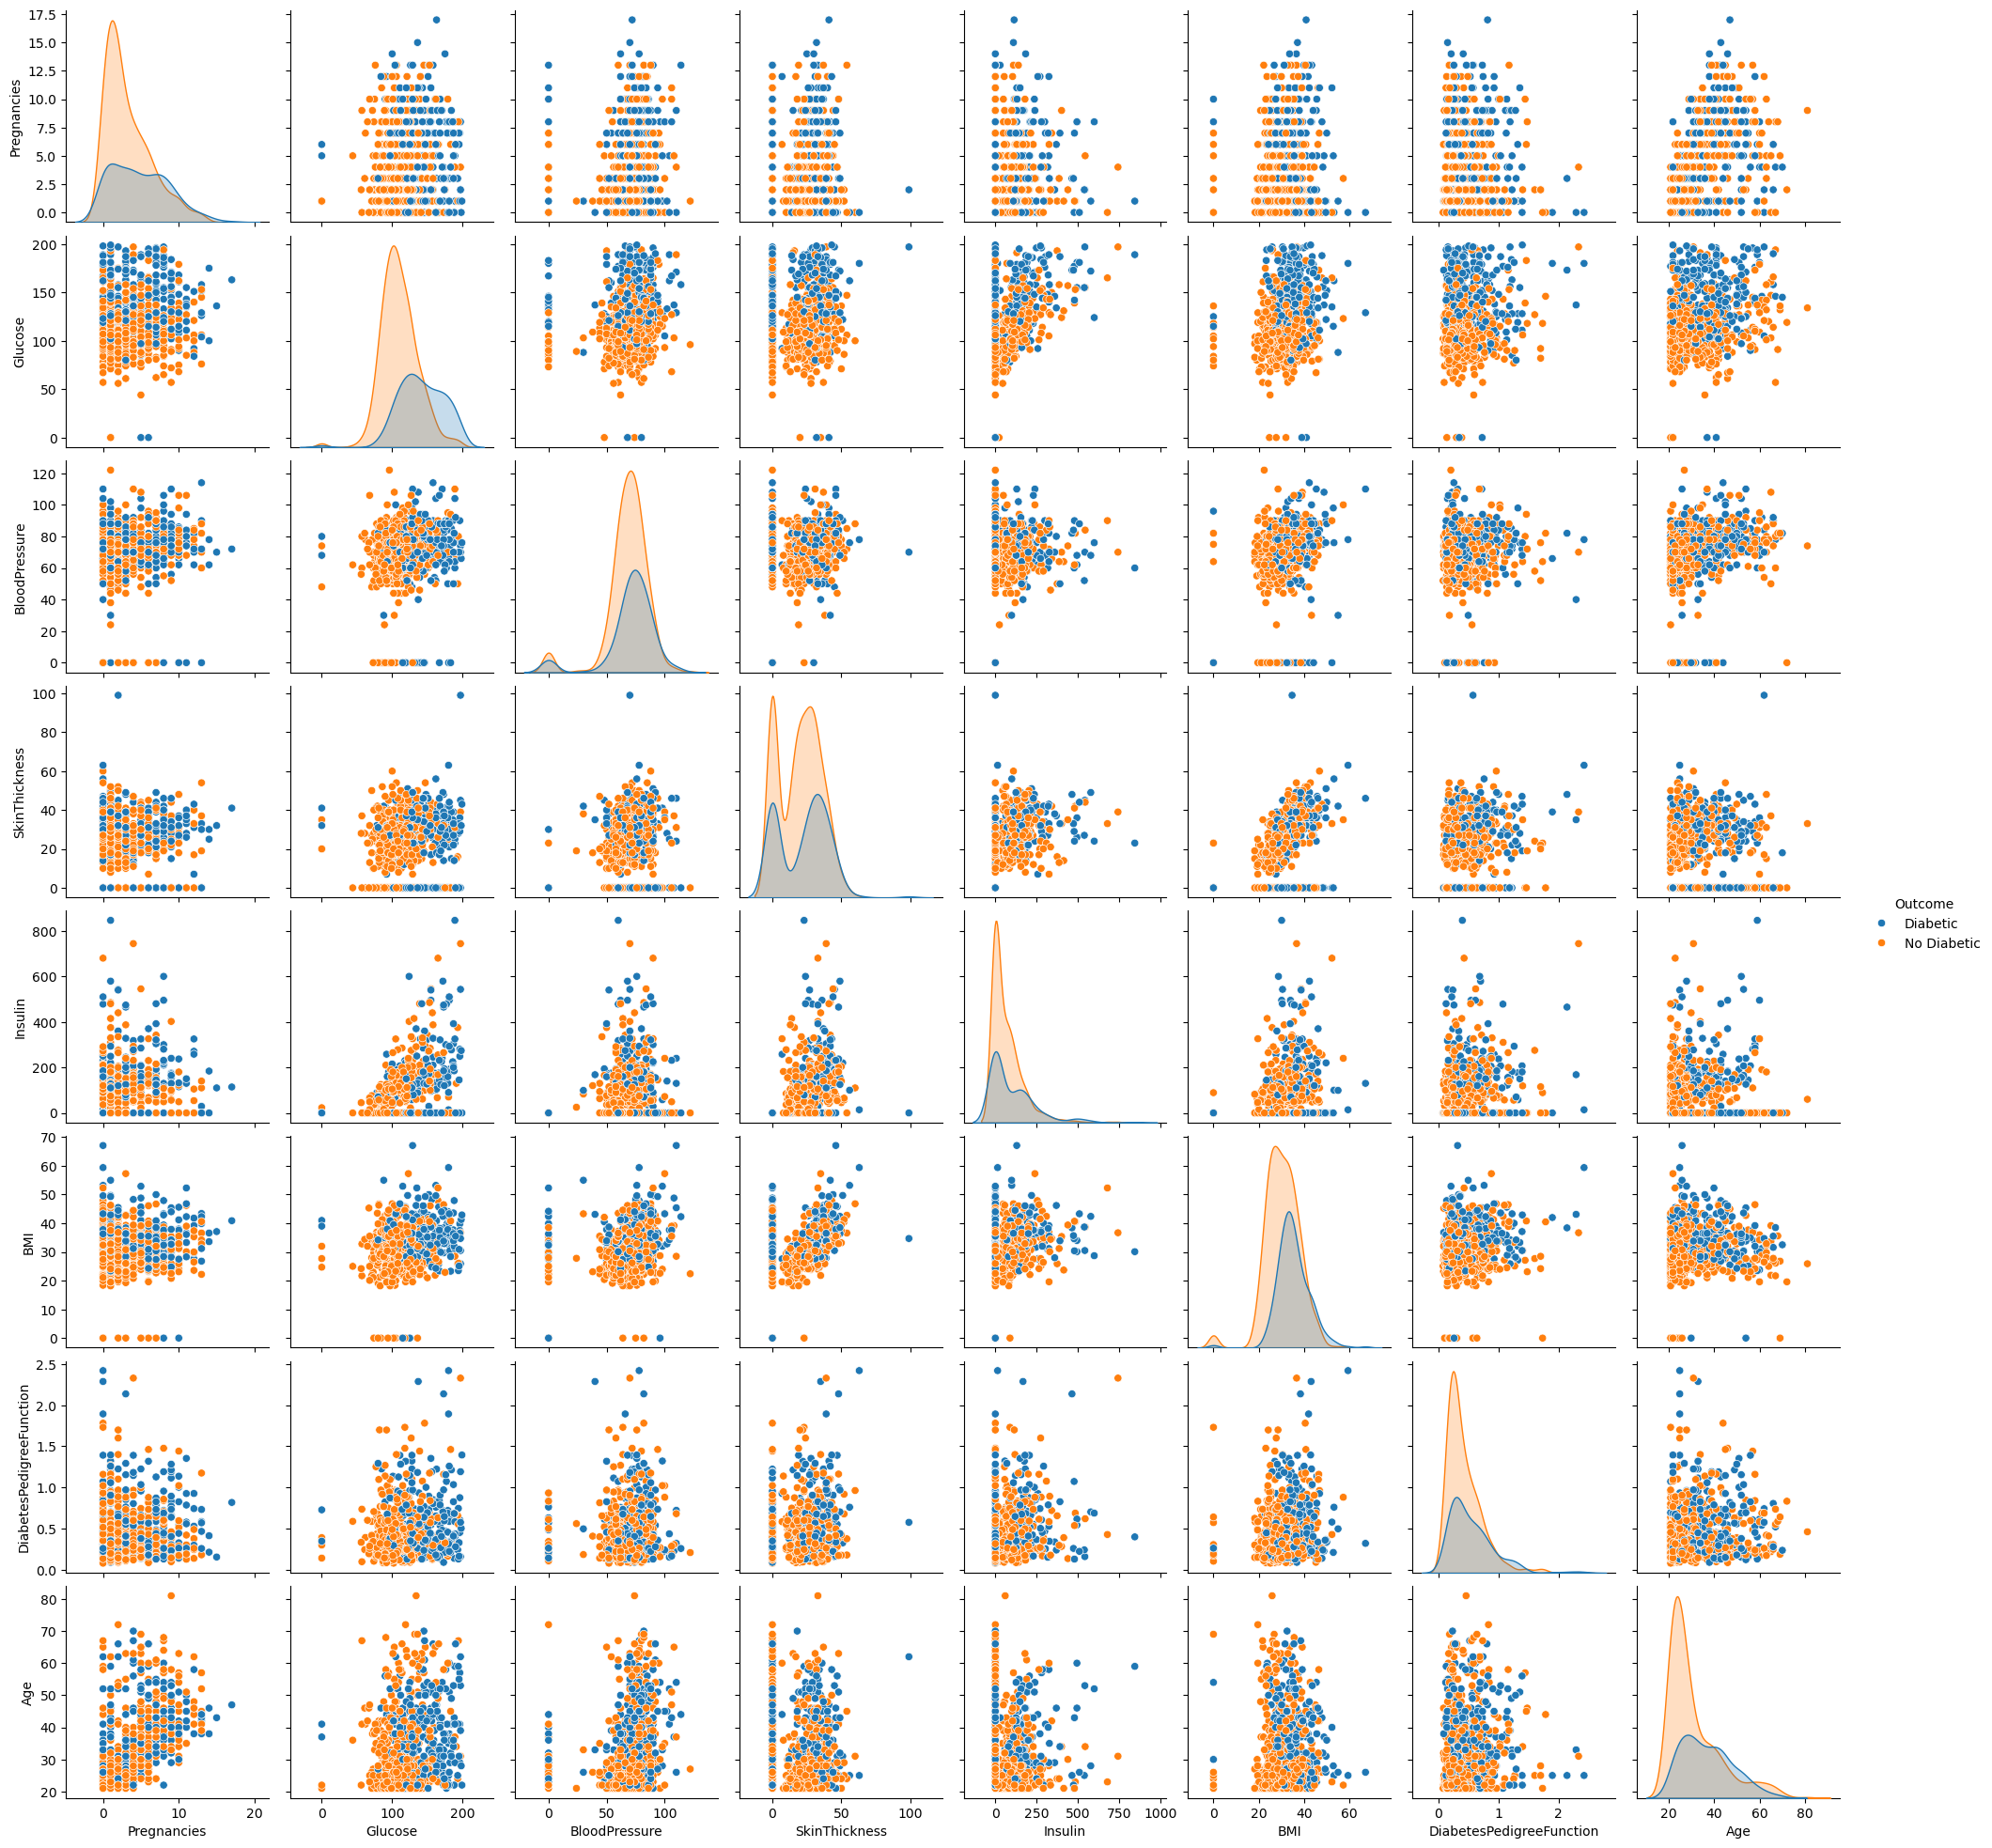

In [6]:
import matplotlib.pyplot as plt
sns.pairplot(df,hue="Outcome")
plt.show()

In [7]:
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
X=df.drop('Outcome',axis=1).values### independent features
y=df['Outcome'].values###dependent features

In [9]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [10]:
#### Libraries From Pytorch
import torch
import torch.nn as nn
import torch.nn.functional as F

In [11]:
##### Creating Tensors
X_train=torch.FloatTensor(X_train)
X_test=torch.FloatTensor(X_test)
y_train=torch.LongTensor(y_train)
y_test=torch.LongTensor(y_test)


In [12]:
df.shape

(768, 9)

In [13]:
#### Creating Modelwith Pytorch

class ANN_Model(nn.Module):
    def __init__(self,input_features=8,hidden1=20,hidden2=20,out_features=2):
        super().__init__()
        self.f_connected1=nn.Linear(input_features,hidden1)
        self.f_connected2=nn.Linear(hidden1,hidden2)
        self.out=nn.Linear(hidden2,out_features)
    def forward(self,x):
        x=F.relu(self.f_connected1(x))
        x=F.relu(self.f_connected2(x))
        x=self.out(x)
        return x

In [14]:
####instantiate my ANN_model
torch.manual_seed(20)
model=ANN_Model()

In [15]:
model.parameters

<bound method Module.parameters of ANN_Model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)>

In [16]:
###Backward Propogation-- Define the loss_function,define the optimizer
loss_function=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)

In [17]:
epochs=500
final_losses=[]
for i in range(epochs):
    i=i+1
    y_pred=model.forward(X_train)
    loss=loss_function(y_pred,y_train)
    final_losses.append(loss.item())  # Changed from loss to loss.item()
    if i%10==1:
        print("Epoch number: {} and the loss : {}".format(i,loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch number: 1 and the loss : 3.4572105407714844
Epoch number: 11 and the loss : 0.8019208312034607
Epoch number: 21 and the loss : 0.6090320944786072
Epoch number: 31 and the loss : 0.5917770266532898
Epoch number: 41 and the loss : 0.5679707527160645
Epoch number: 51 and the loss : 0.5529042482376099
Epoch number: 61 and the loss : 0.5410094857215881
Epoch number: 71 and the loss : 0.5310389399528503
Epoch number: 81 and the loss : 0.5220361351966858
Epoch number: 91 and the loss : 0.5135971903800964
Epoch number: 101 and the loss : 0.5061253905296326
Epoch number: 111 and the loss : 0.49834102392196655
Epoch number: 121 and the loss : 0.49605512619018555
Epoch number: 131 and the loss : 0.4828636944293976
Epoch number: 141 and the loss : 0.4756036400794983
Epoch number: 151 and the loss : 0.47992315888404846
Epoch number: 161 and the loss : 0.4793032109737396
Epoch number: 171 and the loss : 0.46500319242477417


Epoch number: 181 and the loss : 0.45821234583854675
Epoch number: 191 and the loss : 0.4527035653591156
Epoch number: 201 and the loss : 0.4457995891571045
Epoch number: 211 and the loss : 0.44026386737823486
Epoch number: 221 and the loss : 0.4361860454082489
Epoch number: 231 and the loss : 0.42892834544181824
Epoch number: 241 and the loss : 0.43041881918907166
Epoch number: 251 and the loss : 0.4255480468273163
Epoch number: 261 and the loss : 0.4262584447860718
Epoch number: 271 and the loss : 0.419472873210907
Epoch number: 281 and the loss : 0.4296974539756775
Epoch number: 291 and the loss : 0.42818936705589294
Epoch number: 301 and the loss : 0.4414600431919098
Epoch number: 311 and the loss : 0.4139285981655121
Epoch number: 321 and the loss : 0.4003913104534149
Epoch number: 331 and the loss : 0.39472219347953796


Epoch number: 341 and the loss : 0.38907527923583984
Epoch number: 351 and the loss : 0.38485145568847656
Epoch number: 361 and the loss : 0.44172748923301697
Epoch number: 371 and the loss : 0.412299245595932
Epoch number: 381 and the loss : 0.38736942410469055
Epoch number: 391 and the loss : 0.37803947925567627
Epoch number: 401 and the loss : 0.37528443336486816
Epoch number: 411 and the loss : 0.369811087846756
Epoch number: 421 and the loss : 0.3708428740501404
Epoch number: 431 and the loss : 0.370578408241272
Epoch number: 441 and the loss : 0.391954243183136
Epoch number: 451 and the loss : 0.38303324580192566
Epoch number: 461 and the loss : 0.37000852823257446
Epoch number: 471 and the loss : 0.36051231622695923
Epoch number: 481 and the loss : 0.3579603135585785
Epoch number: 491 and the loss : 0.35864076018333435


In [18]:
### plot the loss function
import matplotlib.pyplot as plt
%matplotlib inline

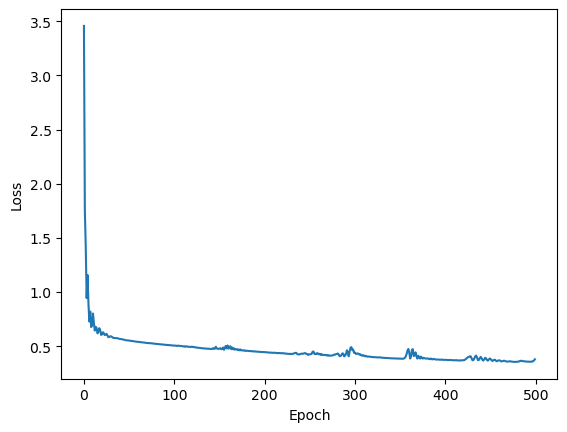

In [19]:
plt.plot(range(epochs),final_losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

In [20]:
#### Prediction In X_test data
predictions=[]
with torch.no_grad():
    for i,data in enumerate(X_test):
        y_pred=model(data)
        predictions.append(y_pred.argmax().item())
        print(y_pred.argmax().item())

1
0
0
1
0
0
1
1
1
0
1
1
0
1
0
0
1
0
1
0
1
0
1
0
0
1
0
1
0
0
1
0
1
1
0
1
1
0
1
1
0
0
0
1
1
0
0
1
1
0
0
0
1
0
1
1
0
0
0
0
1
1
0
1
1
1
1
1
0
0
0
0
0
1
1
0
0
1
0
0
1
1
0
0
0
0
1
1
1
0
0
0
0
0
1
0
0
1
1
1
0
0
0
0
1
1
0
1
0
1
0
1
1
0
1
1
0
1
0
1
0
1
0
0
0
0
0
0
0
0
1
0
0
0
0
1
1
0
1
0
0
1
0
0
1
0
0
0
0
1
0
0
0
0


In [21]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predictions)
cm

array([[78, 29],
       [11, 36]], dtype=int64)

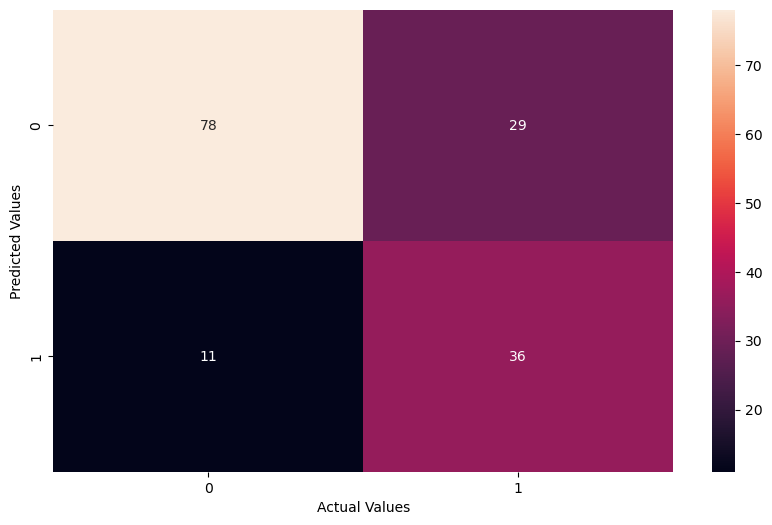

In [22]:
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [23]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,predictions)
score

0.7402597402597403

In [24]:
#### Save the model
torch.save(model,'diabetes.pt')

In [25]:
#### Save And Load the model
model=torch.load('diabetes.pt', weights_only=False)

In [26]:
model.eval()

ANN_Model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)

In [27]:
### Predcition of new data point
list(df.iloc[0,:-1])

[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0]

In [28]:
#### New Data
lst1=[6.0, 130.0, 72.0, 40.0, 0.0, 25.6, 0.627, 45.0]

In [29]:
new_data=torch.tensor(lst1)

In [30]:
#### Predict new data using Pytorch
with torch.no_grad():
    print(model(new_data))
    print(model(new_data).argmax().item())

tensor([1.1835, 1.3768])
1
